(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

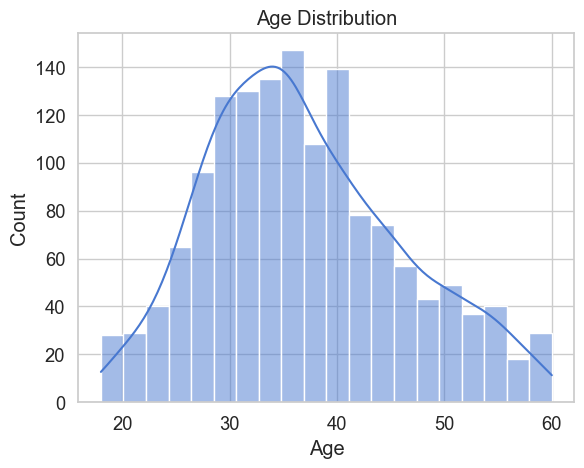

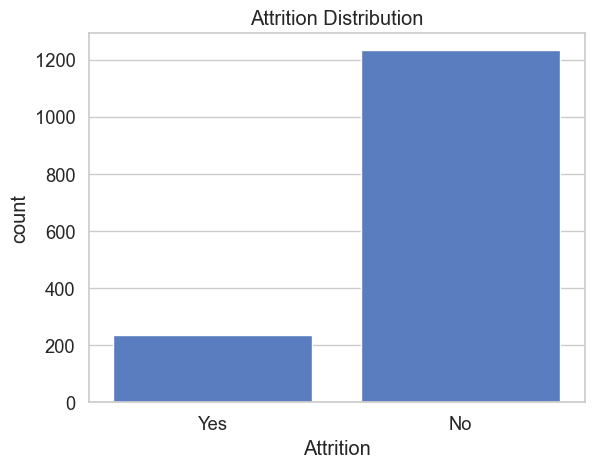

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


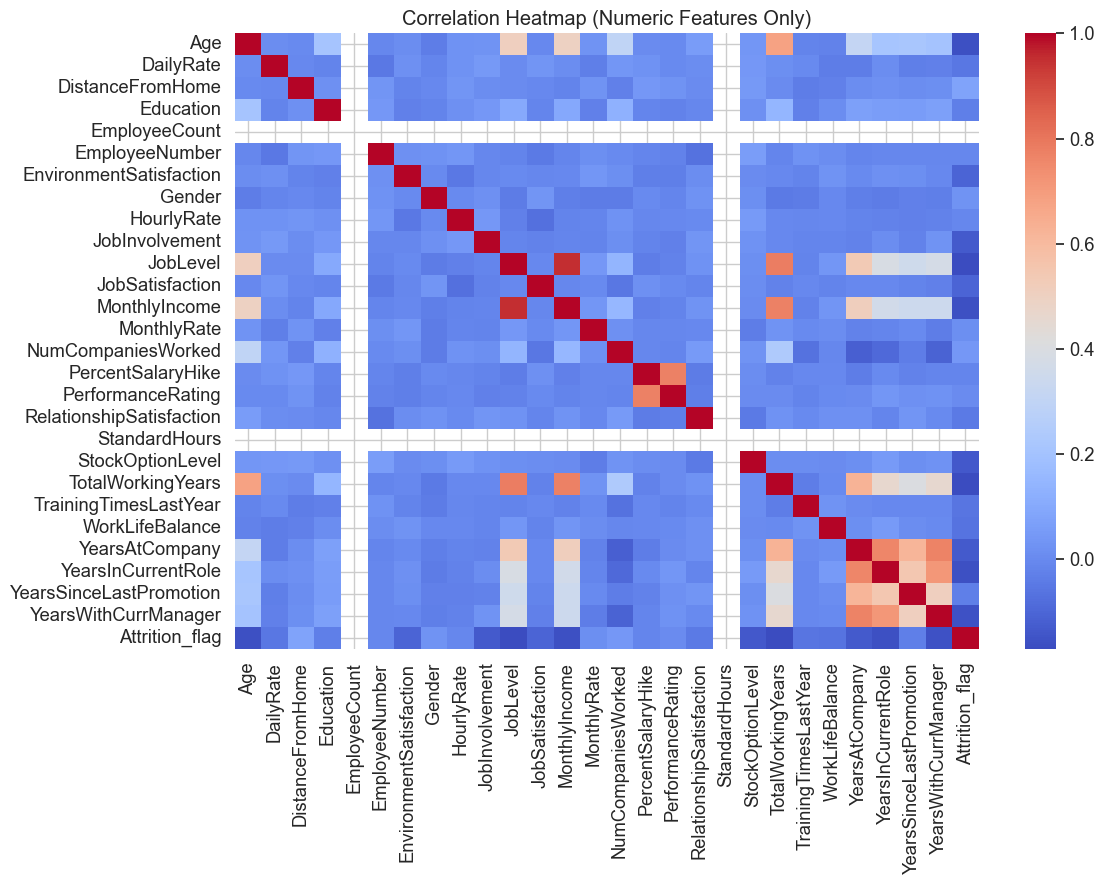

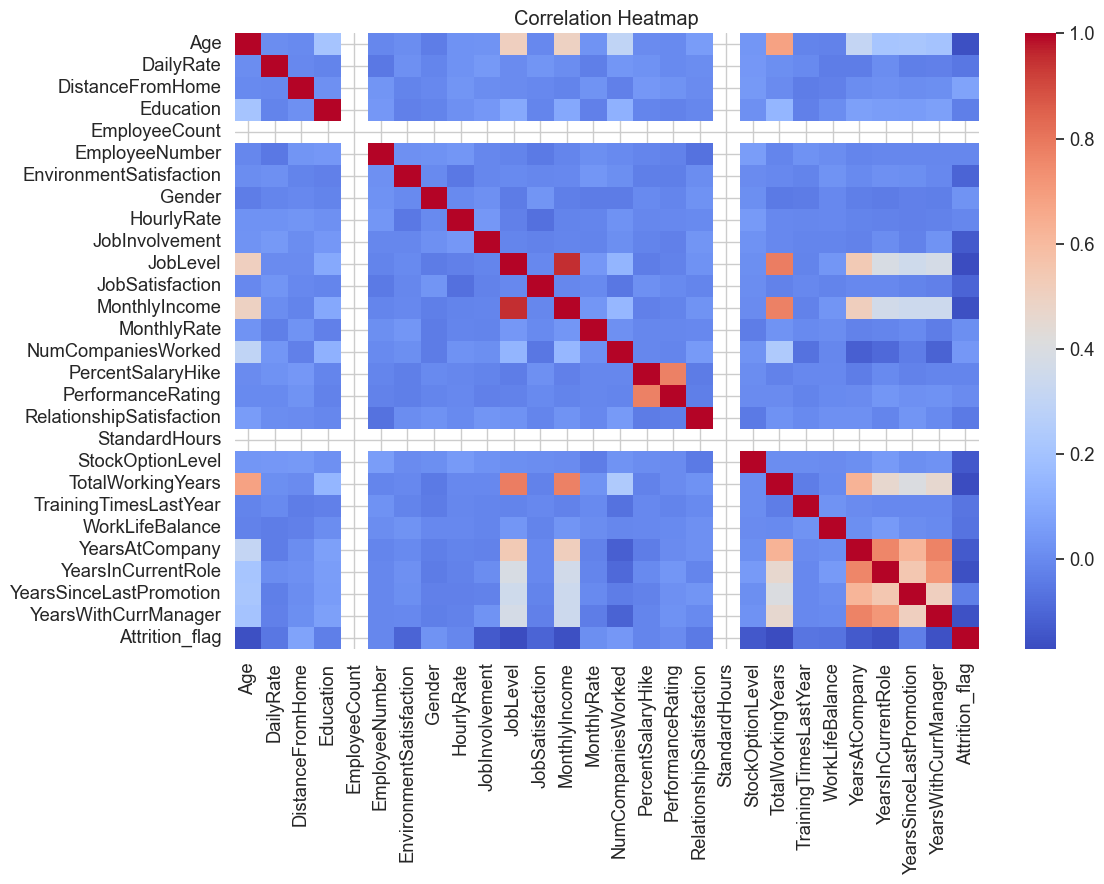


가설 및 결과:

급여가 낮을수록 퇴사율이 높다.
Sales 부서 직원들이 가장 높은 이직률을 보인다.
관리자와 함께한 기간, 현재 직무 기간이 짧을수록 퇴사 위험이 크다.
Stock Option 제공 여부가 퇴사 억제에 중요한 요인이다.
전체적으로 퇴사자는 15~20% 수준이며, 퇴사자의 특성은 “저연차, 저소득, Sales 부서, Stock Option 없음”으로 요약된다.




In [19]:
# Week 03 - HR Attrition EDA
# 이름: 한준형
# 학번: 202312345

# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# 2. 데이터 불러오기 & 전처리
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

print(df.shape)
print(df.info())

# Label Encoding
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# 3. 단변량 분석
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

# 4. 이변량 분석 - Department vs Attrition
dept = pd.crosstab(df["Department"], df["Attrition"], normalize="index") * 100
print(dept)

fig = px.bar(dept, 
             x=dept.index, 
             y=["No","Yes"], 
             barmode="stack", 
             title="Department-wise Attrition Rate (%)")
fig.show()


# Monthly Income vs Attrition
income = df.copy()
income['Income_bin'] = income['MonthlyIncome'].round(-3)
income = income.groupby(['Income_bin','Attrition']).size().reset_index(name='Counts')
fig = px.line(income, x='Income_bin', y='Counts', color='Attrition',
              title='Monthly Income basis counts of People in an Organization')
fig.show()

# Years with Current Manager
mgr = df.groupby(['YearsWithCurrManager','Attrition']).size().reset_index(name='Counts')
fig = px.line(mgr, x='YearsWithCurrManager', y='Counts', color='Attrition',
              title='Count of people spending years with a Manager in an Organization')
fig.show()

# Years in Current Role
role = df.groupby(['YearsInCurrentRole','Attrition']).size().reset_index(name='Counts')
fig = px.line(role, x='YearsInCurrentRole', y='Counts', color='Attrition',
              title='Counts of People working for years in an Organization')
fig.show()

# Stock Option Level vs Attrition
stock = df.groupby(['StockOptionLevel','Attrition']).size().reset_index(name='Counts')
fig = px.bar(stock, x='StockOptionLevel', y='Counts', color='Attrition',
 title='Stock facilities level wise People in an Organization')
fig.show()
df_dep = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
dept = df_dep.groupby(['Department','Attrition']).size().reset_index(name='Counts')

fig = px.bar(dept, x='Department', y='Counts', color='Attrition',
             title='Counts by Department & Attrition', barmode='group')
fig.show()
df_dep = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

print(pd.crosstab(df_dep["Department"], df_dep["Attrition"]))


# 5. 다변량 분석
df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})

num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# 6. 가설 및 결과
print("""
가설 및 결과:

급여가 낮을수록 퇴사율이 높다.
Sales 부서 직원들이 가장 높은 이직률을 보인다.
관리자와 함께한 기간, 현재 직무 기간이 짧을수록 퇴사 위험이 크다.
Stock Option 제공 여부가 퇴사 억제에 중요한 요인이다.
전체적으로 퇴사자는 15~20% 수준이며, 퇴사자의 특성은 “저연차, 저소득, Sales 부서, Stock Option 없음”으로 요약된다.

""")
